**Assignment 5: Informed Search Strategies - PacMan World**

PAC-MAN is one of the most popular game which also can be used as environment to test the "level of intelegence" of Problem-Solving Agents.

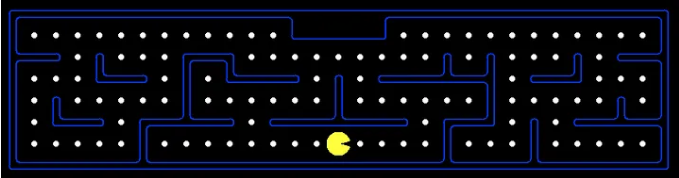

*Goal*: Help Pac-man Agent find its way through the maze. The Agent is required to visit every food pellet at least once on oits way to the exit.

*Techniques*: Heuristic Search - A*

**A* Search:**

Best first search with *f(n) = g(n) + h(n)*

*g(n)* = sum of edge costs from start to *n*

*heuristic function h(n)* = estimate of lowest cost path from *n* to goal

In our example the Euclidean distance is used as a heuristic.

In [4]:
import os
import sys

In [5]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A5/src' #@param {type: "string"}
sys.path.append(path)

In [8]:
from mazeData import makeMaze

In [ ]:
n=10

In [ ]:
a=makeMaze(n)
a

array([[1, 1, 1, 0, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 2, 1],
       [1, 0, 1, 1, 1, 2, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 2, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 0, 2],
       [1, 1, 1, 1, 1, 0, 0, 0, 2, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
a.shape

(10, 10)

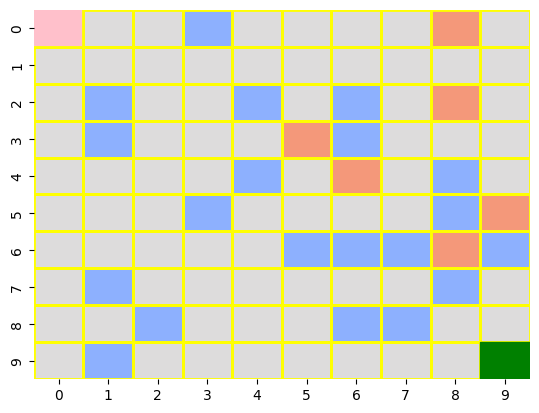

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    #print(colors)
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i==0 and j==0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i==maze.shape[0]-1 and j==maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()


draw_maze(a)

In [ ]:
a

array([[1, 1, 1, 0, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 2, 1],
       [1, 0, 1, 1, 1, 2, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 2, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 0, 2],
       [1, 1, 1, 1, 1, 0, 0, 0, 2, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
from mazeData import defineMazeAvailableActions

In [ ]:
mazeAvailableActs=defineMazeAvailableActions(a)

In [ ]:
mazeAvailableActs

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'right'],
 (0, 4): ['left', 'right', 'down'],
 (0, 5): ['left', 'right'],
 (0, 6): ['left', 'right', 'down'],
 (0, 7): ['left', 'right', 'down'],
 (0, 8): ['left', 'down'],
 (0, 9): [],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'up', 'right', 'down'],
 (1, 2): ['left', 'up', 'down'],
 (1, 3): [],
 (1, 4): ['up', 'down'],
 (1, 5): [],
 (1, 6): ['up', 'right', 'down'],
 (1, 7): ['left', 'up', 'right', 'down'],
 (1, 8): ['left', 'up', 'right'],
 (1, 9): ['left'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'right', 'down'],
 (2, 2): ['left', 'up', 'right', 'down'],
 (2, 3): ['left', 'right'],
 (2, 4): ['left', 'up', 'right'],
 (2, 5): ['left', 'right', 'down'],
 (2, 6): ['left', 'up', 'right'],
 (2, 7): ['left', 'up', 'down'],
 (2, 8): [],
 (2, 9): [],
 (3, 0): ['up', 'right', 'down'],
 (3, 1): ['left', 'up', 'right', 'down'],
 (3, 2): ['left', 'up'

In [ ]:
from mazeData import makeMazeTransformationModel

In [ ]:
maze=makeMazeTransformationModel(mazeAvailableActs)

In [ ]:
maze

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4)},
 (0, 4): {'left': (0, 3), 'right': (0, 5), 'down': (1, 4)},
 (0, 5): {'left': (0, 4), 'right': (0, 6)},
 (0, 6): {'left': (0, 5), 'right': (0, 7), 'down': (1, 6)},
 (0, 7): {'left': (0, 6), 'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'down': (1, 8)},
 (0, 9): {},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'down': (2, 2)},
 (1, 3): {},
 (1, 4): {'up': (0, 4), 'down': (2, 4)},
 (1, 5): {},
 (1, 6): {'up': (0, 6), 'right': (1, 7), 'down': (2, 6)},
 (1, 7): {'left': (1, 6), 'up': (0, 7), 'right': (1, 8), 'down': (2, 7)},
 (1, 8): {'left': (1, 7), 'up': (0, 8), 'right': (1, 9)},
 (1, 9): {'left': (1, 8)},
 (2, 0): {'up': (1, 0), 'right': (2, 1)

In [ ]:
from mazeGraphClass import mazeGraph

In [ ]:
mazeWorldGraph=mazeGraph(maze)

In [ ]:
mazeWorldGraph.graph_dict

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4)},
 (0, 4): {'left': (0, 3), 'right': (0, 5), 'down': (1, 4)},
 (0, 5): {'left': (0, 4), 'right': (0, 6)},
 (0, 6): {'left': (0, 5), 'right': (0, 7), 'down': (1, 6)},
 (0, 7): {'left': (0, 6), 'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'down': (1, 8)},
 (0, 9): {},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'down': (2, 2)},
 (1, 3): {},
 (1, 4): {'up': (0, 4), 'down': (2, 4)},
 (1, 5): {},
 (1, 6): {'up': (0, 6), 'right': (1, 7), 'down': (2, 6)},
 (1, 7): {'left': (1, 6), 'up': (0, 7), 'right': (1, 8), 'down': (2, 7)},
 (1, 8): {'left': (1, 7), 'up': (0, 8), 'right': (1, 9)},
 (1, 9): {'left': (1, 8)},
 (2, 0): {'up': (1, 0), 'right': (2, 1)

In [ ]:
mazeWorldGraph.get((0, 0))

{(0, 1): 2, (1, 0): 1}

In [ ]:
mazeWorldGraph.get((4, 7))

{(4, 6): 2, (3, 7): 3, (4, 8): 2}

In [ ]:
from mazeProblemClass import MazeProblem

In [ ]:
from mazeData import getFoodLocation

In [ ]:
initState, goalState=(0,0),getFoodLocation(a)
print(initState, goalState)

(0, 0) (1, 2)


In [ ]:
mp1=MazeProblem(initState,goalState,mazeWorldGraph)

In [ ]:
mp1.actions((4, 7))

['left', 'up', 'right']

In [ ]:
from nodeClass import Node
import math
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2))#Find the Euclidean distance between one and two dimensional points:

2.24


In [ ]:
from agentsPrograms import A_StarSearchAgentProgram

In [ ]:
f1=A_StarSearchAgentProgram(math.dist)

In [ ]:
f1(mp1)

[(2.236, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
[(3.0, <Node (1, 0)>), (3.4139999999999997, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
The child node <Node (2, 0)>.
[(3.4139999999999997, <Node (0, 1)>), (4.0, <Node (1, 1)>), (4.236000000000001, <Node (2, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
[(4.0, <Node (1, 1)>), (4.236000000000001, <Node (2, 0)>), (5.0, <Node (0, 2)>)]
The node (1, 1) is extracted from frontier:
The child node <Node (1, 2)>.
The child node <Node (2, 1)>.
[(4.236000000000001, <Node (2, 0)>), (5.0, <Node (0, 2)>), (5.0, <Node (1, 2)>), (5.414, <Node (2, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
[(5.0, <Node (0, 2)>), (5.414, <Node (2, 1)>), (5.0, <Node (1, 2)>), (5.827999999999999, <Node (3, 0)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0,

<Node (1, 2)>

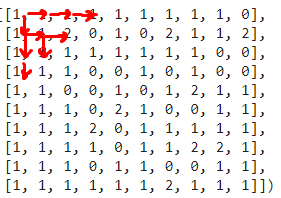

In [ ]:
from agents import ProblemSolvingMazeAgentAStar

In [ ]:
AStar_MazeAgent1=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalState)

In [ ]:
AStar_MazeAgent1.goal

(1, 2)

In [ ]:
print(AStar_MazeAgent1((0,2)))

[(1.0, <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(1.0, <Node (1, 2)>), (3.4139999999999997, <Node (0, 3)>), (3.4139999999999997, <Node (0, 1)>)]
The node (1, 2) is extracted from frontier:
We have found our goal: (1, 2)
<Node (1, 2)>
Solution (a sequence of actions) from the initial state to a goal: ['down']
down


In [ ]:
goalStates=[goalState, (n-1,n-1)]

In [ ]:
initState

(0, 0)

In [ ]:
AStar_MazeAgent2=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)

In [ ]:
AStar_MazeAgent2.goal

[(1, 2), (9, 9)]

In [ ]:
AStar_MazeAgent2.run()

goal list: [(1, 2), (9, 9)]
current percept: (0, 0)
current goal: (1, 2)
[(2.236, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
[(3.0, <Node (1, 0)>), (3.4139999999999997, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
The child node <Node (2, 0)>.
[(3.4139999999999997, <Node (0, 1)>), (4.0, <Node (1, 1)>), (4.236000000000001, <Node (2, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
[(4.0, <Node (1, 1)>), (4.236000000000001, <Node (2, 0)>), (5.0, <Node (0, 2)>)]
The node (1, 1) is extracted from frontier:
The child node <Node (1, 2)>.
The child node <Node (2, 1)>.
[(4.236000000000001, <Node (2, 0)>), (5.0, <Node (0, 2)>), (5.0, <Node (1, 2)>), (5.414, <Node (2, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
[(5.0, <Node (0, 2)>), (5.414, <Node (2, 1)>), (5.0, <Node (1, 2)>), (5.827999999999999, <Node (3, 0

[['down', 'right', 'right'],
 ['down',
  'right',
  'right',
  'right',
  'right',
  'right',
  'down',
  'down',
  'right',
  'down',
  'down',
  'down',
  'down',
  'down',
  'right']]

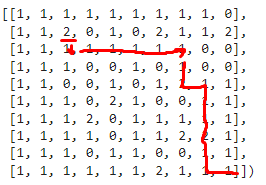

In [ ]:
goalStates=[goalState, (n-1,n-1)]
goalStates

[(1, 2), (9, 9)]

In [ ]:
AStar_MazeAgent3=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)

In [ ]:
a

array([[1, 1, 1, 0, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 2, 1],
       [1, 0, 1, 1, 1, 2, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 2, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 0, 2],
       [1, 1, 1, 1, 1, 0, 0, 0, 2, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
s,p=AStar_MazeAgent3.run()

goal list: [(1, 2), (9, 9)]
current percept: (0, 0)
current goal: (1, 2)
[(2.236, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
[(3.0, <Node (1, 0)>), (3.4139999999999997, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
The child node <Node (2, 0)>.
[(3.4139999999999997, <Node (0, 1)>), (4.0, <Node (1, 1)>), (4.236000000000001, <Node (2, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
[(4.0, <Node (1, 1)>), (4.236000000000001, <Node (2, 0)>), (5.0, <Node (0, 2)>)]
The node (1, 1) is extracted from frontier:
The child node <Node (1, 2)>.
The child node <Node (2, 1)>.
[(4.236000000000001, <Node (2, 0)>), (5.0, <Node (0, 2)>), (5.0, <Node (1, 2)>), (5.414, <Node (2, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
[(5.0, <Node (0, 2)>), (5.414, <Node (2, 1)>), (5.0, <Node (1, 2)>), (5.827999999999999, <Node (3, 0

In [ ]:
p

[[<Node (0, 0)>, <Node (1, 0)>, <Node (1, 1)>, <Node (1, 2)>],
 [<Node (1, 2)>,
  <Node (2, 2)>,
  <Node (2, 3)>,
  <Node (2, 4)>,
  <Node (2, 5)>,
  <Node (2, 6)>,
  <Node (2, 7)>,
  <Node (3, 7)>,
  <Node (4, 7)>,
  <Node (4, 8)>,
  <Node (5, 8)>,
  <Node (6, 8)>,
  <Node (7, 8)>,
  <Node (8, 8)>,
  <Node (9, 8)>,
  <Node (9, 9)>]]

In [ ]:
a

array([[1, 1, 1, 0, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 2, 1],
       [1, 0, 1, 1, 1, 2, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 2, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 0, 2],
       [1, 1, 1, 1, 1, 0, 0, 0, 2, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
import copy
resolvedMaze=copy.deepcopy(a)
i=3
for path in p:
  for node in path:
    resolvedMaze[node.state[0],node.state[1]]=i
  i+=1



In [ ]:
resolvedMaze

array([[3, 1, 1, 0, 1, 1, 1, 1, 2, 1],
       [3, 3, 4, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 4, 4, 4, 4, 4, 4, 2, 1],
       [1, 0, 1, 1, 1, 2, 0, 4, 1, 1],
       [1, 1, 1, 1, 0, 1, 2, 4, 4, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 4, 2],
       [1, 1, 1, 1, 1, 0, 0, 0, 4, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 4, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 4, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 4, 4]])

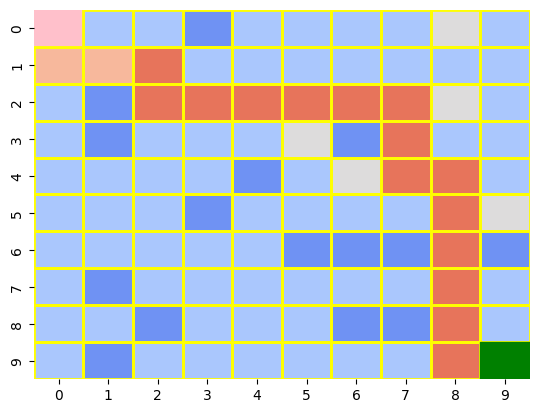

In [ ]:
draw_maze(resolvedMaze)

**Tasks:**

1. Refine the given implementaion of the A* search by outputting the number of nodes expanded on the way to the goal ('green' cell) and the total cost of the path.
2. Implement a different version of the A* search which uses a Manhattan distance as the heuristic function. Compare the results with previous version of the algorithm. Visualize the path using differrent colors for its components (from the start to goal1, from the goal1 to.., etc.)
3. Create the refined Maze:
* the food locations are 10% of the space and distributed randomly (even the start and finish points may contain food).
* there are 5 Ghosts hidden (the Agent can't figure out the location of the GHost) in the Maze (randomly, but not in the start and finish points, the locations of Fixed Food Dots and Ghosts must also be different).
4. The Pac-man Agent must find all Fixed Food Dots and then find the finish point (the results of task 2 are supposed to be used). The search of Fixed Food Dots must be rational: the 1st 'food' goal must be the most cost-optimal among other Food Dots.
5. The inital perforamnce of Agent is 20% of space cells. After reaching a Fixed Food Dot the agent's performance doubles. If the Agent encounters Ghosts, it fights. But only the strong Agent (with performance > 30% of space cells) can win. Otherwise the Agent will be killed by Ghost. If the Agent wins, he will lose 10% of his previous effectiveness after the battle.
6. Implemet IDA* or RBFS (the algorithm is assigned to the team during the lab class) search and apply it for tasks 4-5.